In [28]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [29]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [30]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [31]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X

# it is full bayesian and in predictive part, will use sequential learning
def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [32]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.01033748279952336


In [33]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


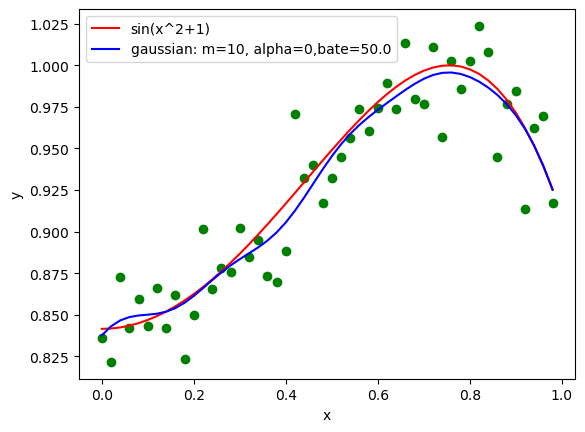

w:  [ 0.7116412   0.33525309 -0.60993733  1.01788058 -1.11454313  1.25057643
 -0.96945452  0.90355533 -0.46941092  0.37285962]


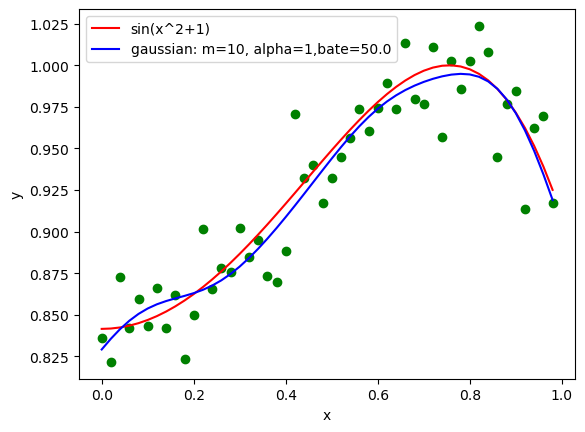

w:  [ 0.76233276  0.09481883 -0.0377835   0.05650362  0.04313287  0.02707223
  0.09322008  0.06869787  0.01461844  0.16179707]


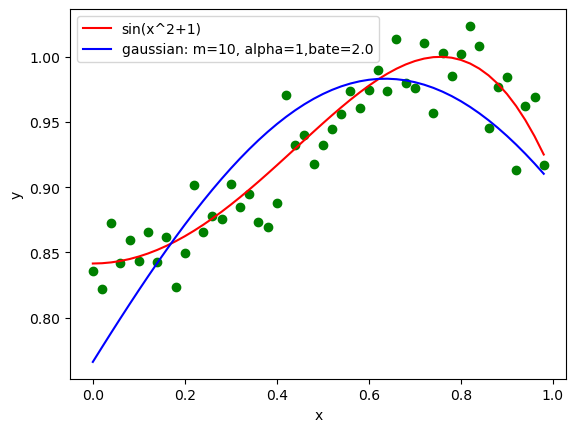

w:  [0.25852196 0.04506361 0.04203494 0.0447749  0.05388618 0.06924963
 0.0900004  0.11460888 0.14105585 0.16707506]


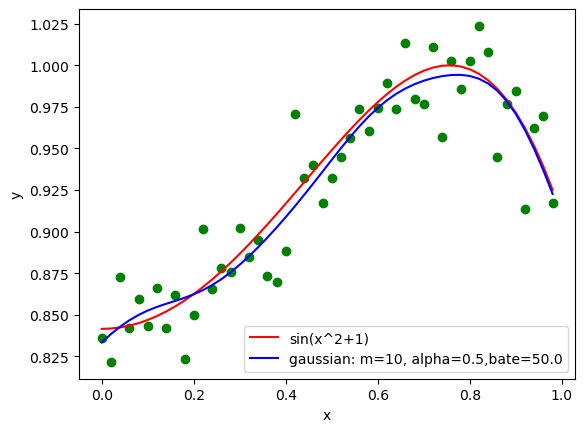

w:  [ 0.78032376  0.07950522 -0.04378355  0.06273056  0.0293575   0.02259929
  0.09003533  0.06296265  0.01417372  0.14622873]


In [34]:
params = [(0.02, 0), (0.02, 1), (0.5, 1), (0.02, 0.5)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



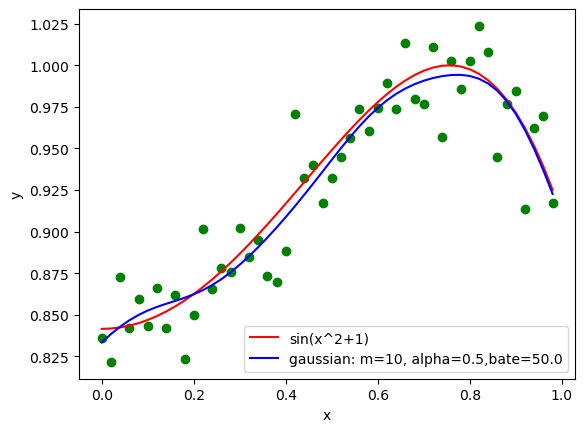

w:  [ 0.78032376  0.07950522 -0.04378355  0.06273056  0.0293575   0.02259929
  0.09003533  0.06296265  0.01417372  0.14622873]


In [35]:
param = [(0.02, 0.5)]
for var_el, al in param:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)

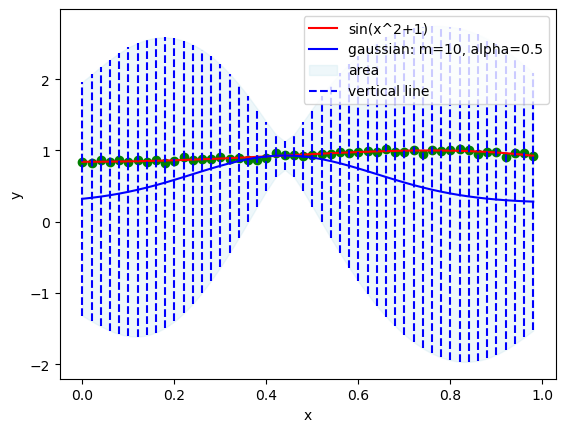

[22]
1


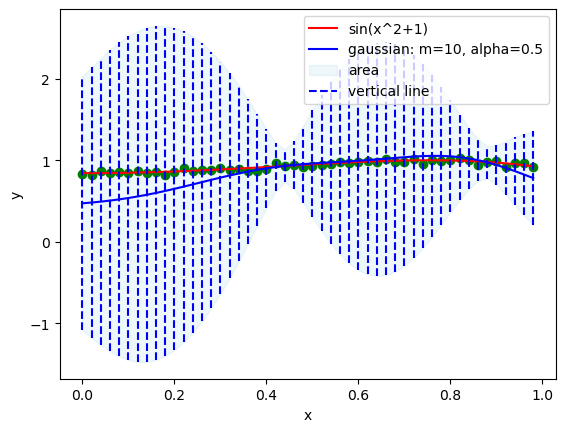

[22, 44]
2


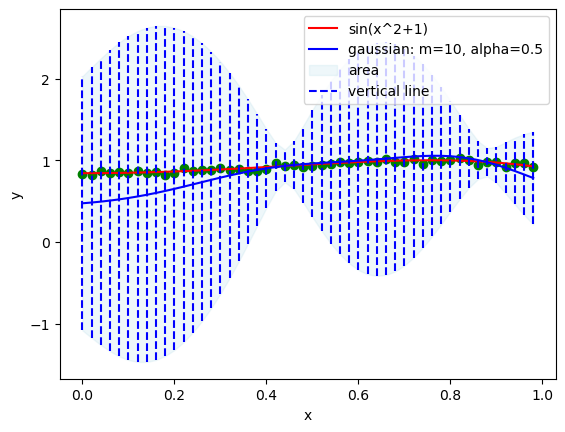

[22, 44, 44]
3


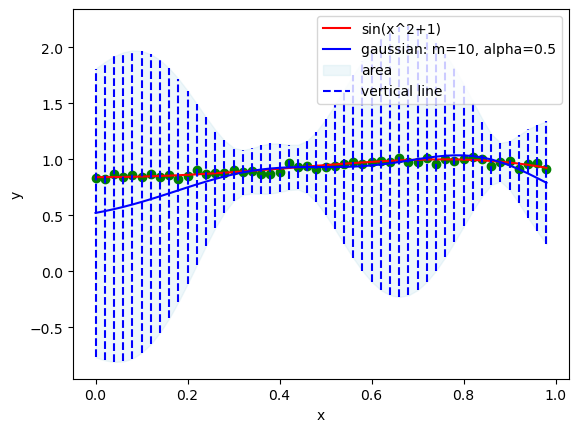

[22, 44, 44, 16]
4


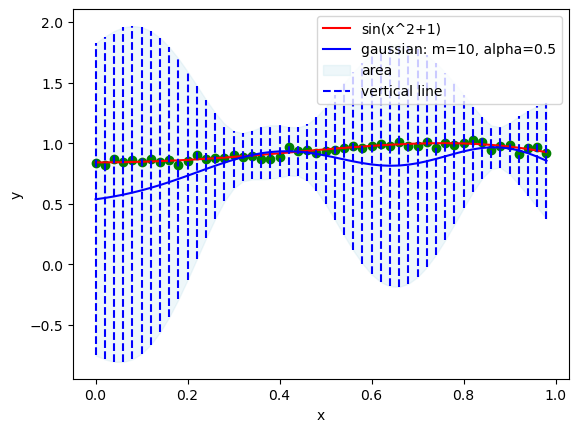

[22, 44, 44, 16, 43]
5


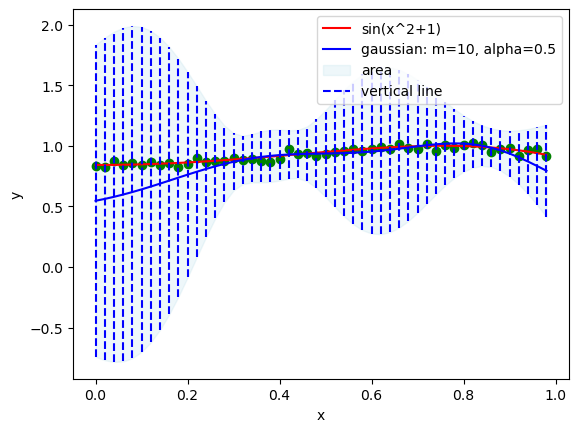

[22, 44, 44, 16, 43, 41]
6


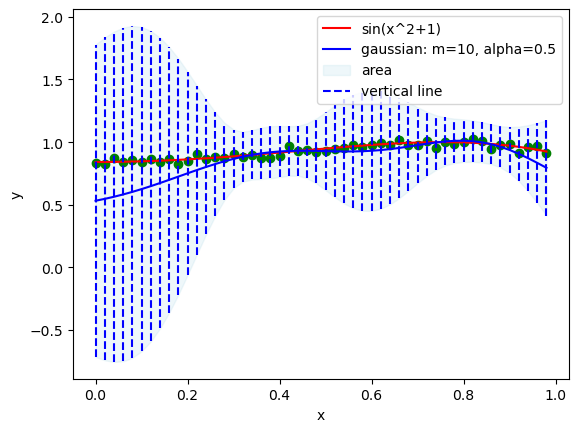

[22, 44, 44, 16, 43, 41, 38]
7


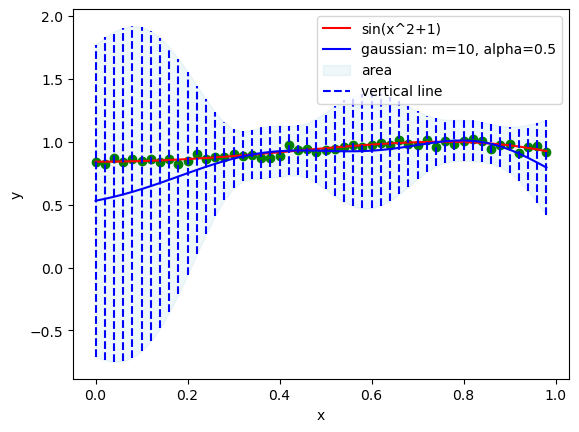

[22, 44, 44, 16, 43, 41, 38, 38]
8


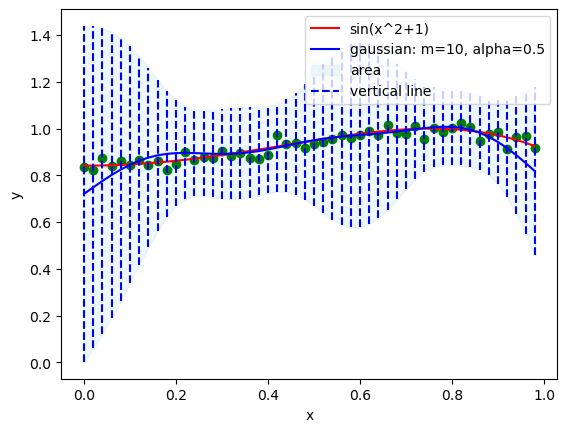

[22, 44, 44, 16, 43, 41, 38, 38, 11]
9


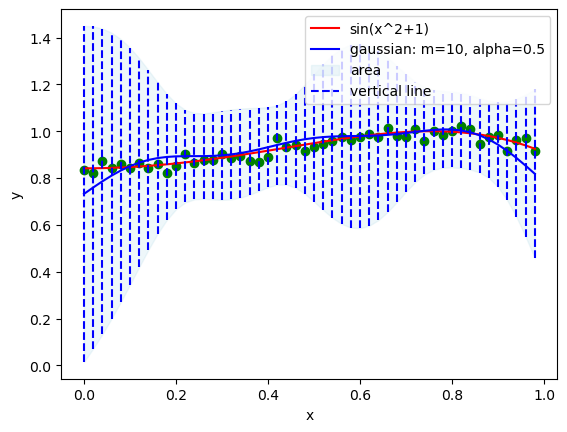

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21]
10


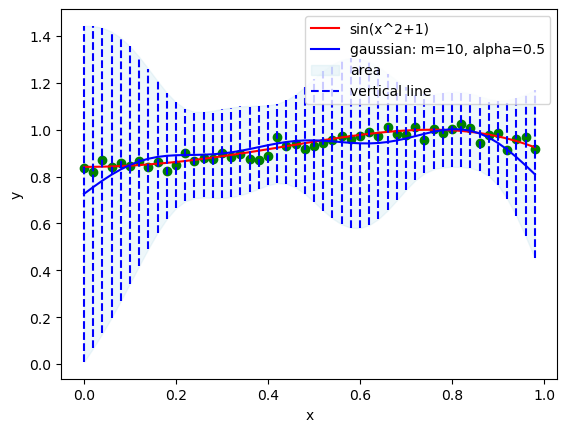

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37]
11


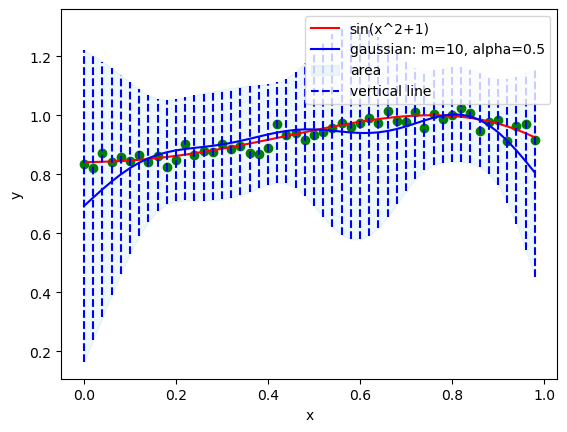

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8]
12


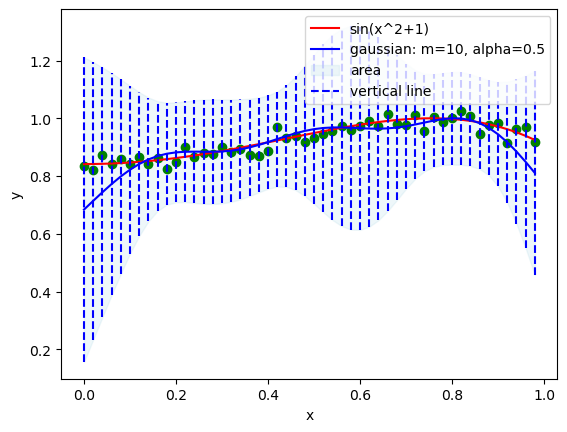

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19]
13


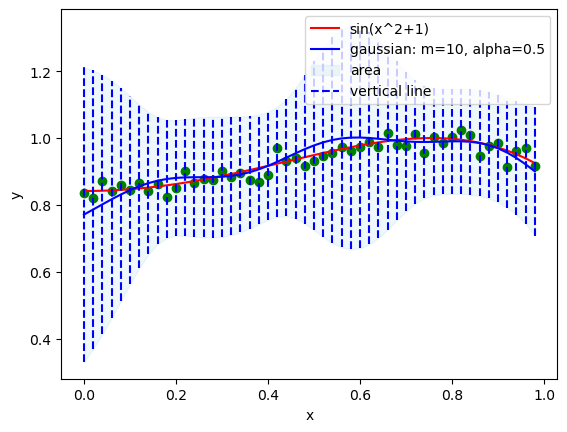

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49]
14


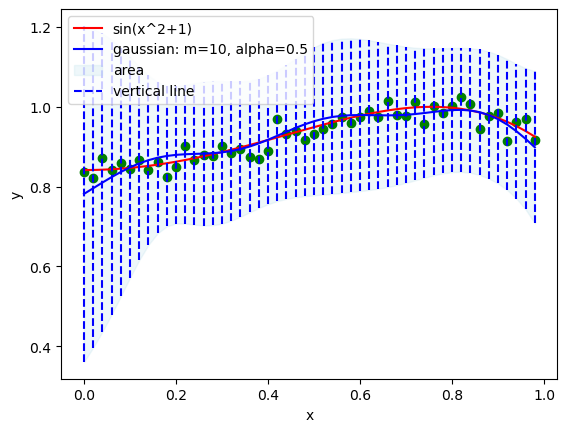

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30]
15


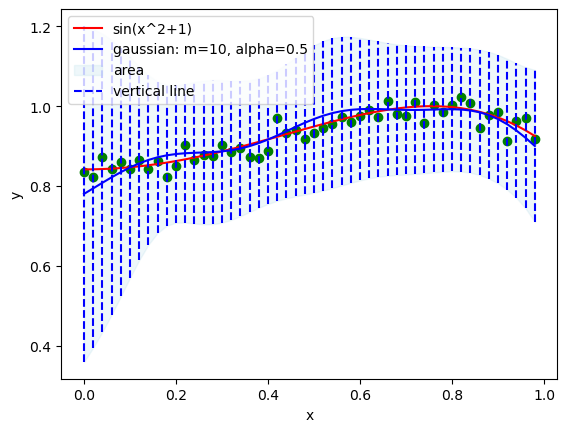

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33]
16


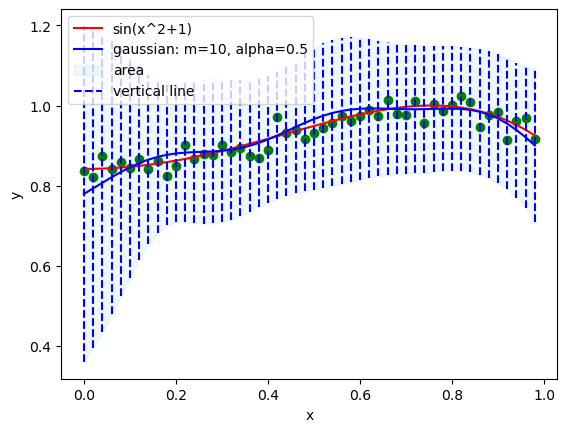

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22]
17


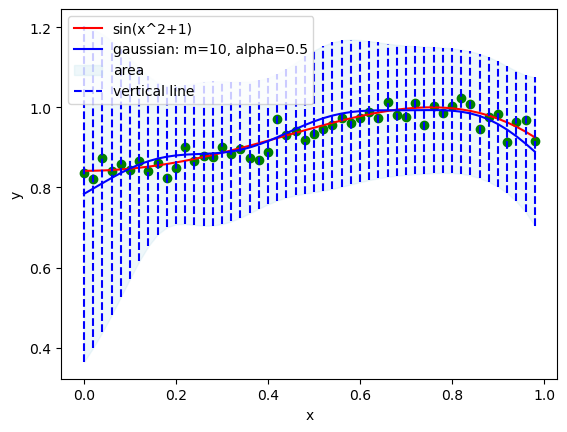

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46]
18


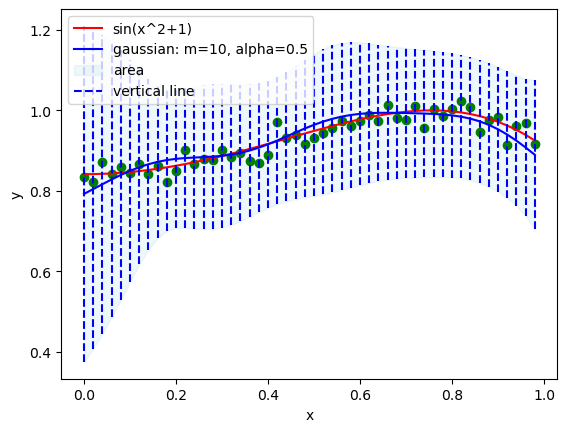

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43]
19


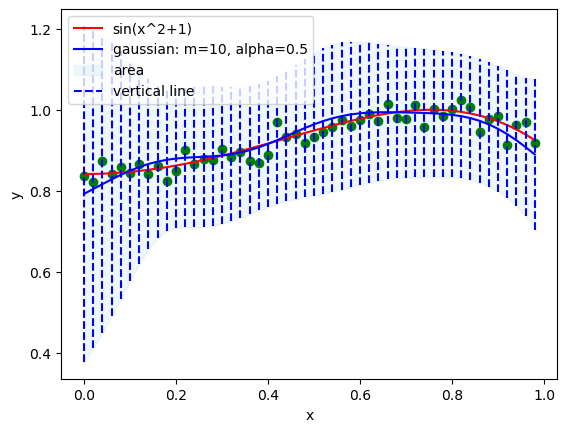

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17]
20


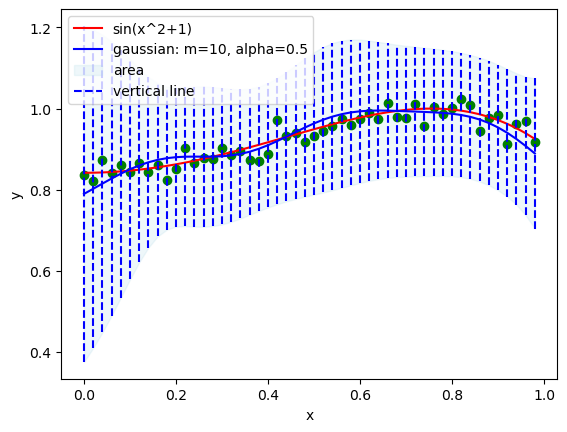

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19]
21


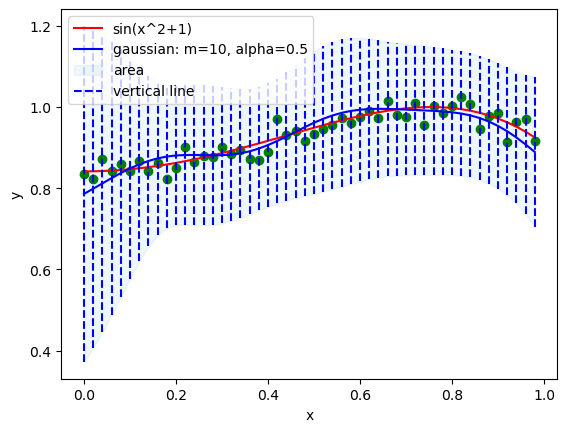

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20]
22


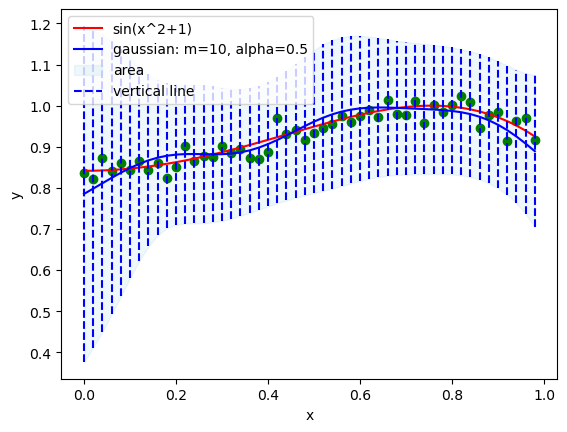

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16]
23


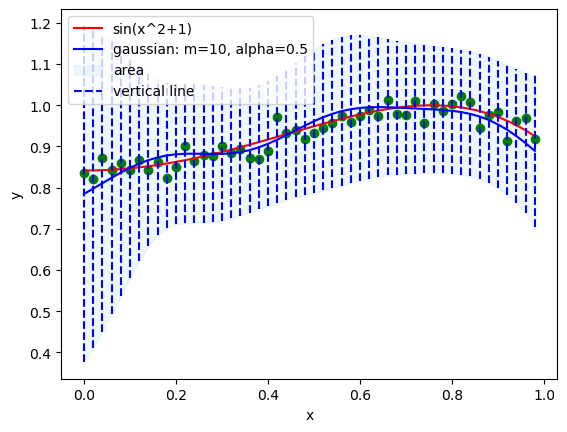

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39]
24


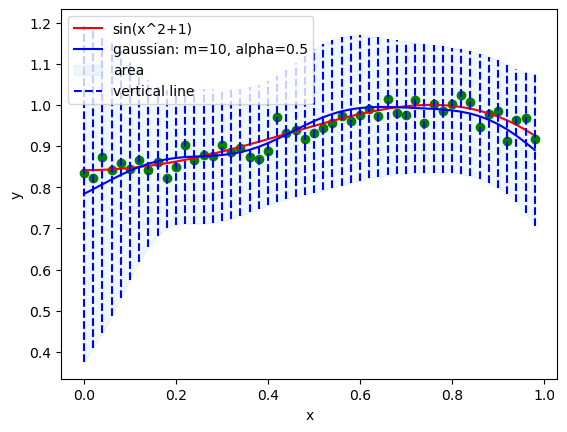

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10]
25


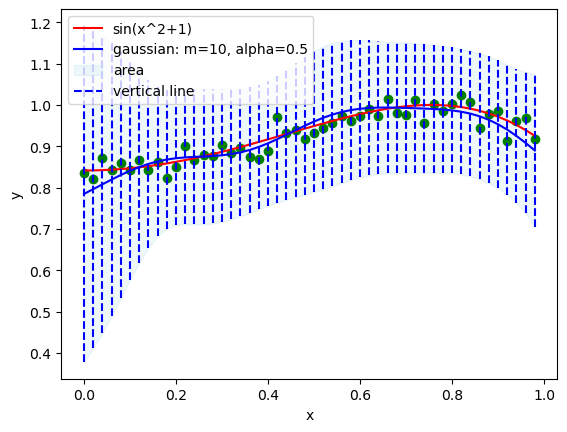

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31]
26


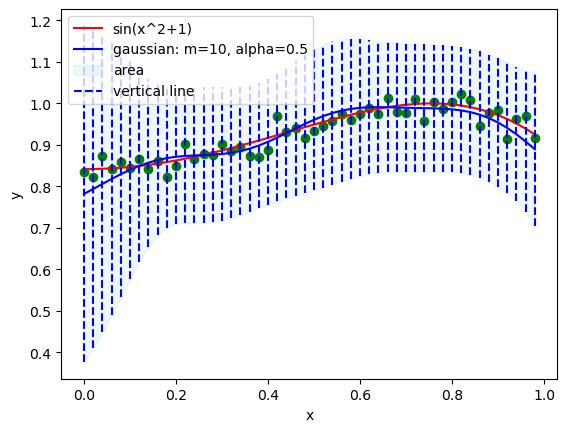

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35]
27


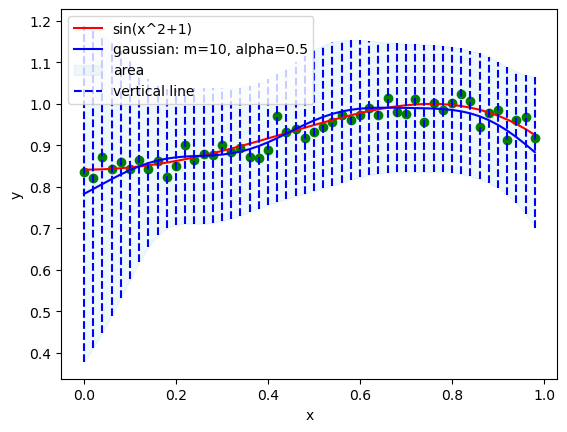

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46]
28


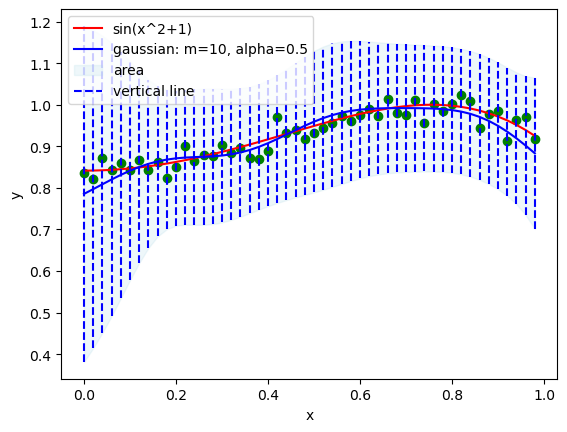

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38]
29


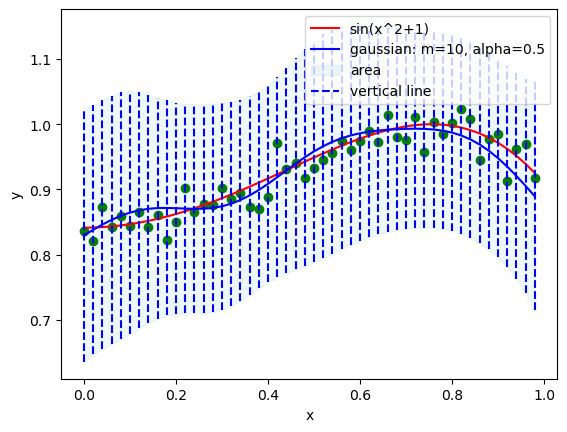

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0]
30


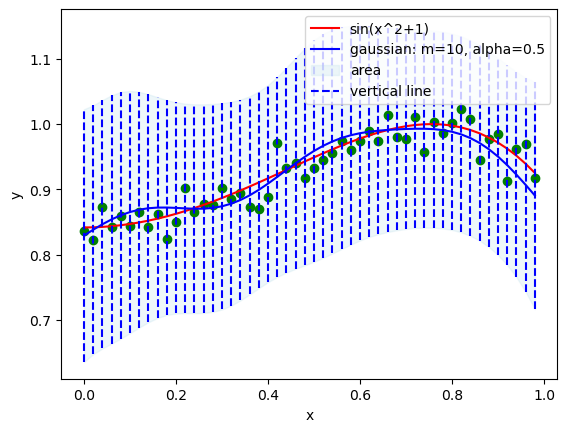

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44]
31


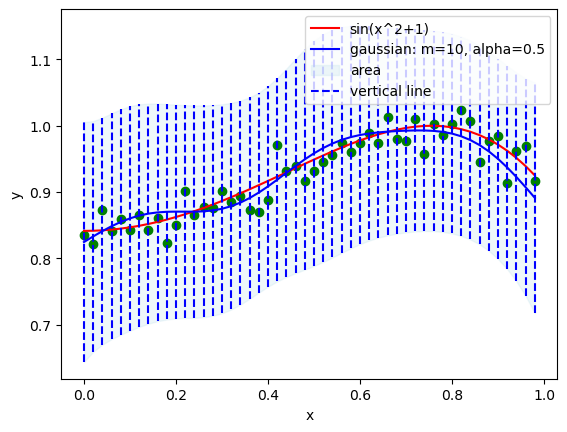

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3]
32


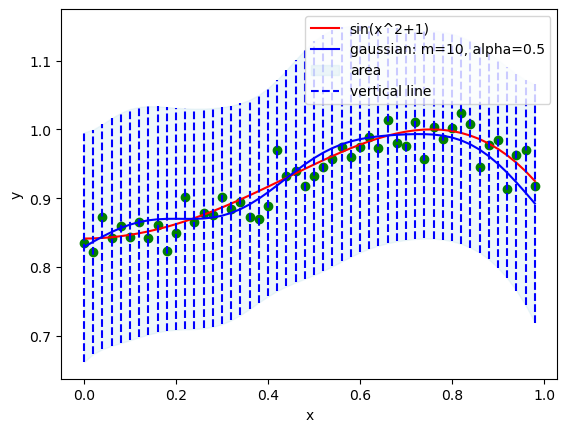

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0]
33


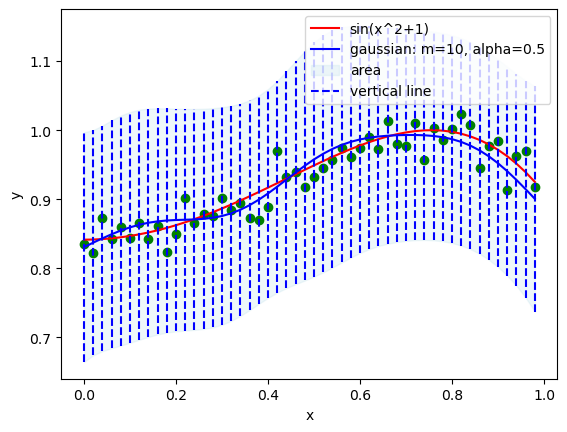

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49]
34


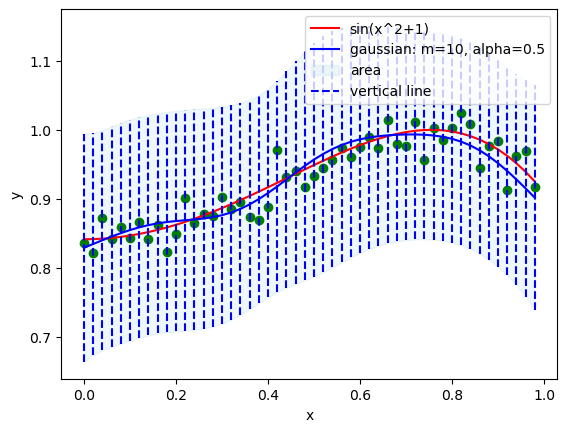

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5]
35


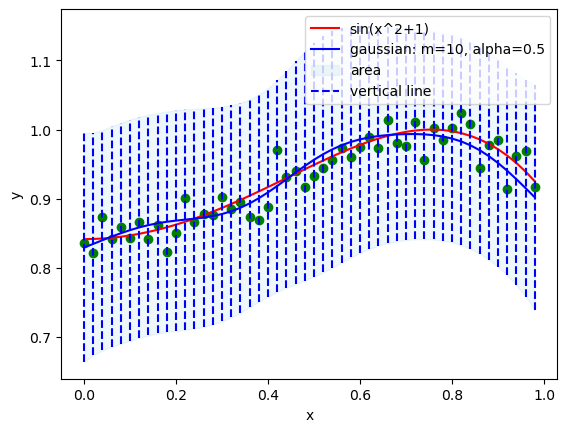

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17]
36


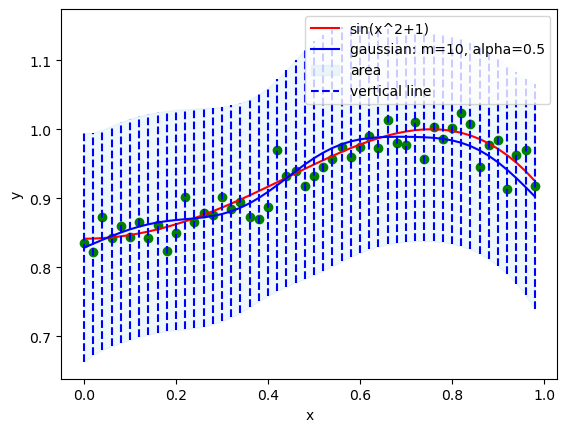

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37]
37


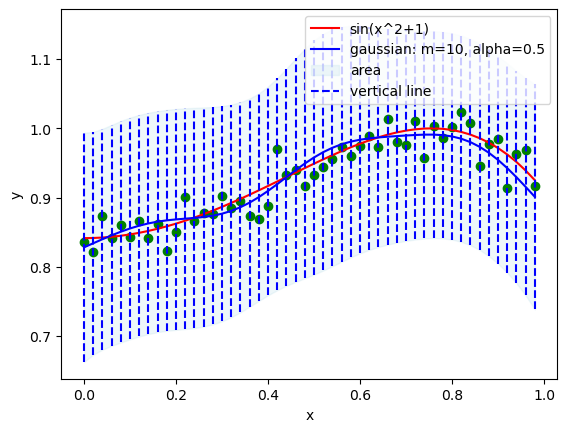

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41]
38


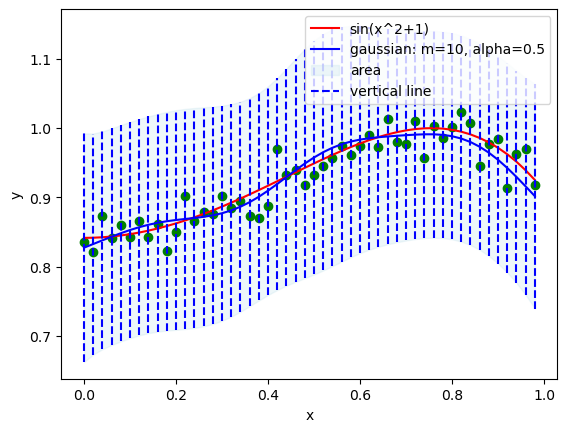

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5]
39


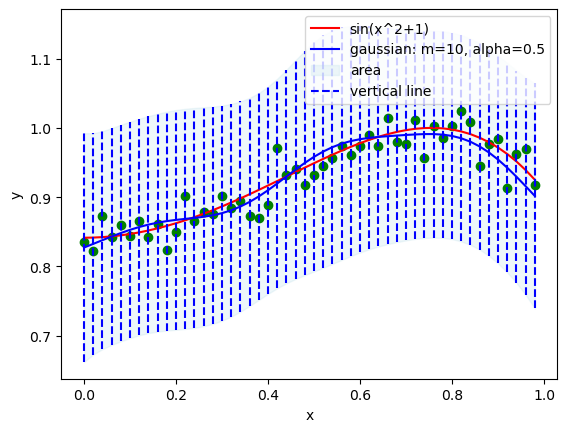

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22]
40


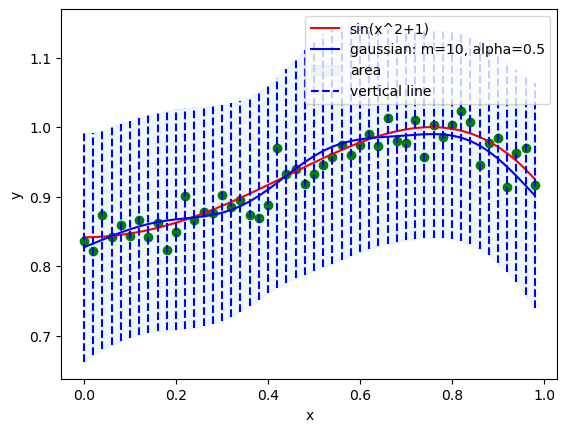

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35]
41


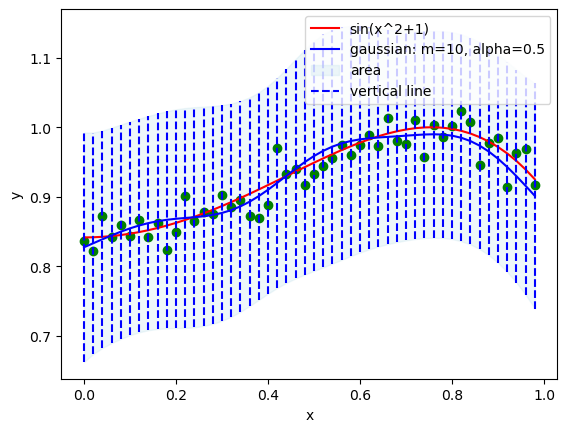

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35, 6]
42


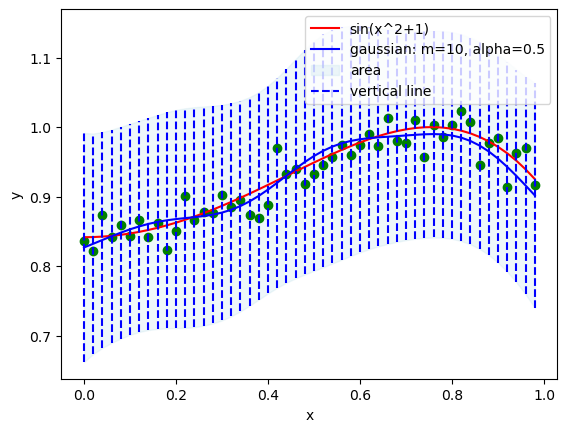

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35, 6, 5]
43


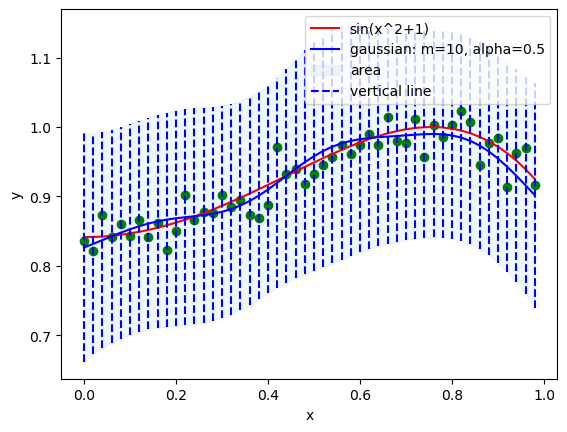

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35, 6, 5, 13]
44


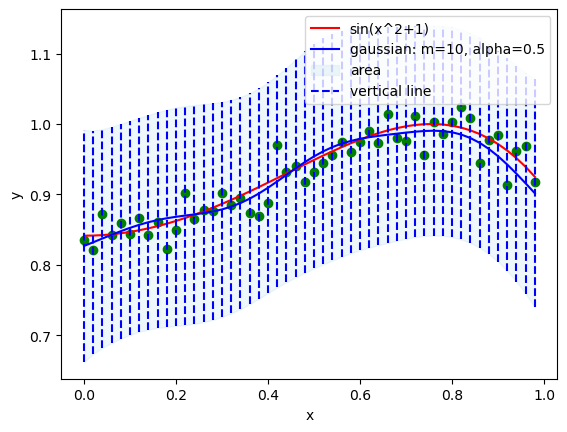

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35, 6, 5, 13, 27]
45


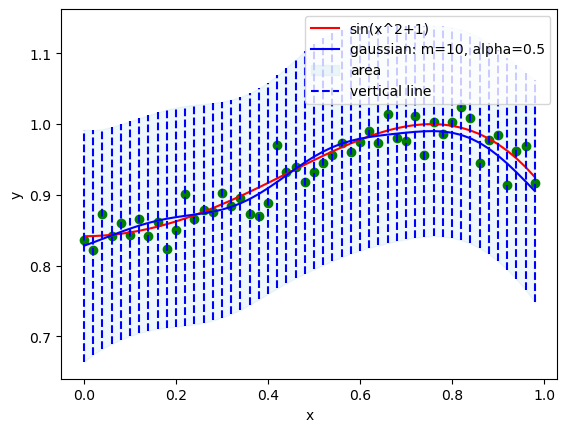

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35, 6, 5, 13, 27, 49]
46


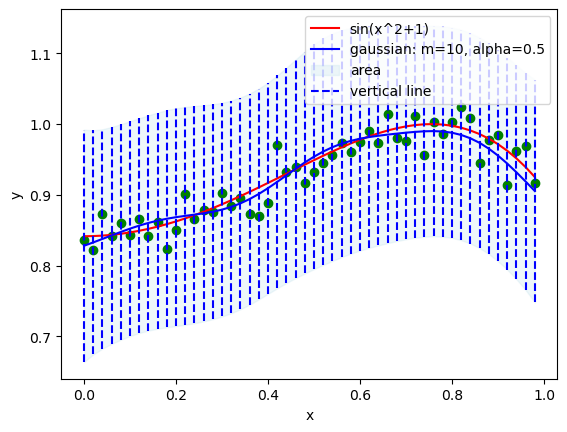

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35, 6, 5, 13, 27, 49, 14]
47


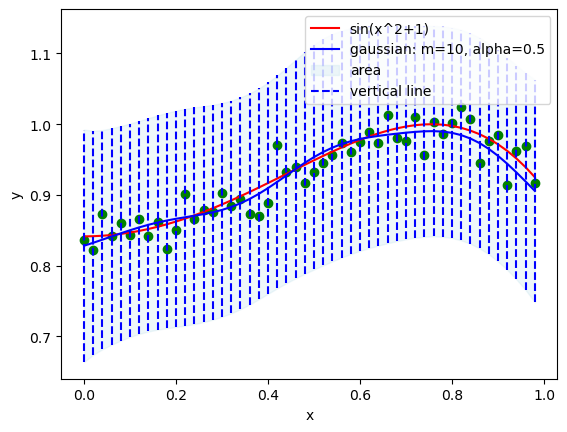

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35, 6, 5, 13, 27, 49, 14, 7]
48


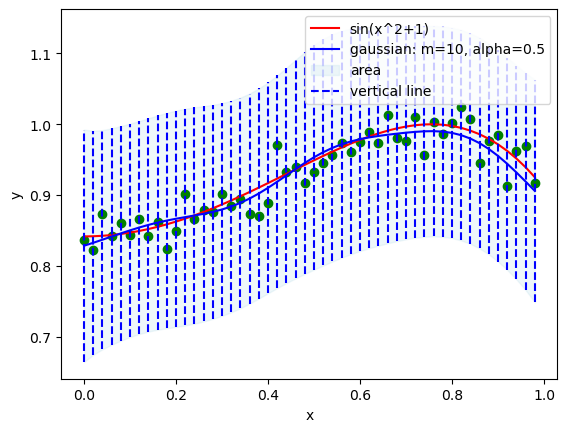

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35, 6, 5, 13, 27, 49, 14, 7, 17]
49


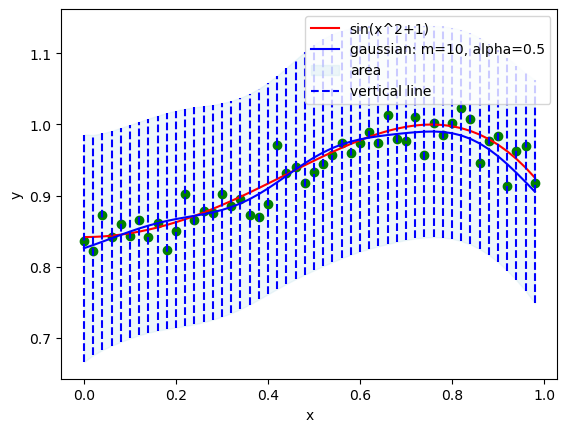

[22, 44, 44, 16, 43, 41, 38, 38, 11, 21, 37, 8, 19, 49, 30, 33, 22, 46, 43, 17, 19, 20, 16, 39, 10, 31, 35, 46, 38, 0, 44, 3, 0, 49, 5, 17, 37, 41, 5, 22, 35, 6, 5, 13, 27, 49, 14, 7, 17, 1]
50


In [36]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


# i_arr = []
# 
# # x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
# _, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)
# 
# for i in range(0, 50):
#     index = random.randint(0, 49)
#     i_arr.append(index)
#     # x_arr.append(x[index])
#     # y_noise_arr.append(y_noise[index])
#     w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
#     y_ = X @ w_
#     var_x = []
#     for el in X:
#         var_x.append(var + el.T @ ss @ el)
# 
#     display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
#     print(i_arr)
#     print(i + 1)


def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


i_arr = []

# x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)
mn = np.zeros(m).reshape(-1, 1)
sn_1 = alpha * np.identity(m)
sn = np.linalg.inv(sn_1)
for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # sequential learning
    sn_1_pre = sn_1
    sn_1 = sn_1_pre + (1 / var) * (X[index].reshape(-1, 1)) @ (X[index].reshape(1, -1))
    sn = np.linalg.inv(sn_1)
    mn = sn @ (sn_1_pre @ mn + (1 / var) * (X[index].reshape(-1, 1)) @ (y_noise[index].reshape(1, 1)))
    y_ = X @ mn
    var_x = []
    for el in X:
        var_x.append(var + el.T @ sn @ el)

    display_distribution(m, alpha, x, y_.reshape(-1), y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)
